In [15]:
import numpy as np
import matplotlib.pyplot as plt

Voir la page wikipédia : https://fr.wikipedia.org/wiki/Ensemble_de_Mandelbrot

$z_0 = 0$

$z_{n+1} = z_n^2 + c$

Ecrire en itératif et en récursif une fonction qui calcule le ne terme de la suite de Mandelbrot.

In [ ]:
def mandelbrot_ite(n, c=0):
    pass

def mandelbrot_rec(n, c=0):
    pass

L'ensemble de Mandelbrot est défini comme l'ensemble des nombres complexes $c$ pour lesquels la suite définie par la relation de récurrence $z_{n+1} = z_n^2 + c$ et $z_0 = 0$ ne diverge pas vers l'infini.

Cet ensemble est inclus dans la boule de rayon 2 centrée à l'origine dans le plan complexe.

> On peut montre que s'il existe un entier n tel que $|z_n| > 2$, alors la suite diverge vers l'infini (et donc c n'appartient pas à l'ensemble de Mandelbrot). 

Compléter la fonction suivante, qui calcule le temps que met la suite pour sortir de la boule de rayon 2 centrée à l'origine. Si la suite ne sort pas de la boule de rayon 2 avant d'atteindre le nombre d'itérations maximum, on renvoie le nombre d'itérations maximum.

In [ ]:
def mandelbrot_time_to_escape(c, n_max=100):
    pass

In [18]:
c_test = complex(0.355, 0.355)

# Test the functions
z_ite = mandelbrot_ite(28, c_test)
print(f"Mandelbrot Iterative = {z_ite:.2f}  > norm = {abs(z_ite):.2f}")

z_rec = mandelbrot_rec(28, c_test)
print(f"Mandelbrot Recursive = {z_rec:.2f}  > norm = {abs(z_rec):.2f}")

z_escape = mandelbrot_time_to_escape(c_test)
print(f"Time to escape = {z_escape}")

Mandelbrot Iterative = -0.09+2.37j  > norm = 2.37
Mandelbrot Recursive = -0.09+2.37j  > norm = 2.37
Time to escape = 29


La fonction suivante permet d'afficher l'ensemble de Mandelbrot sur la zone `bounds` avec un pas de la résolution `step`.

In [19]:
def plot_mandelbrot(ax, bounds, step, log_color_scale=True):
    Y, X = np.mgrid[bounds[3]:bounds[2]:-step, bounds[0]:bounds[1]:step]
    # print(X)
    # print(Y)
    # Grid of mandelbrot_time_to_escape for each point in the grid
    z = np.empty(X.shape, dtype=int)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z[i, j] = mandelbrot_time_to_escape(complex(X[i, j], Y[i, j]), n_max=2000)
    # print(z)
    if log_color_scale:
        ax.imshow(np.log(z + 1), extent=bounds, cmap='hot', interpolation='bilinear')
    else:
        ax.imshow(z, extent=bounds, cmap='hot', interpolation='bilinear')

Tester la fonction sur différentes zones.

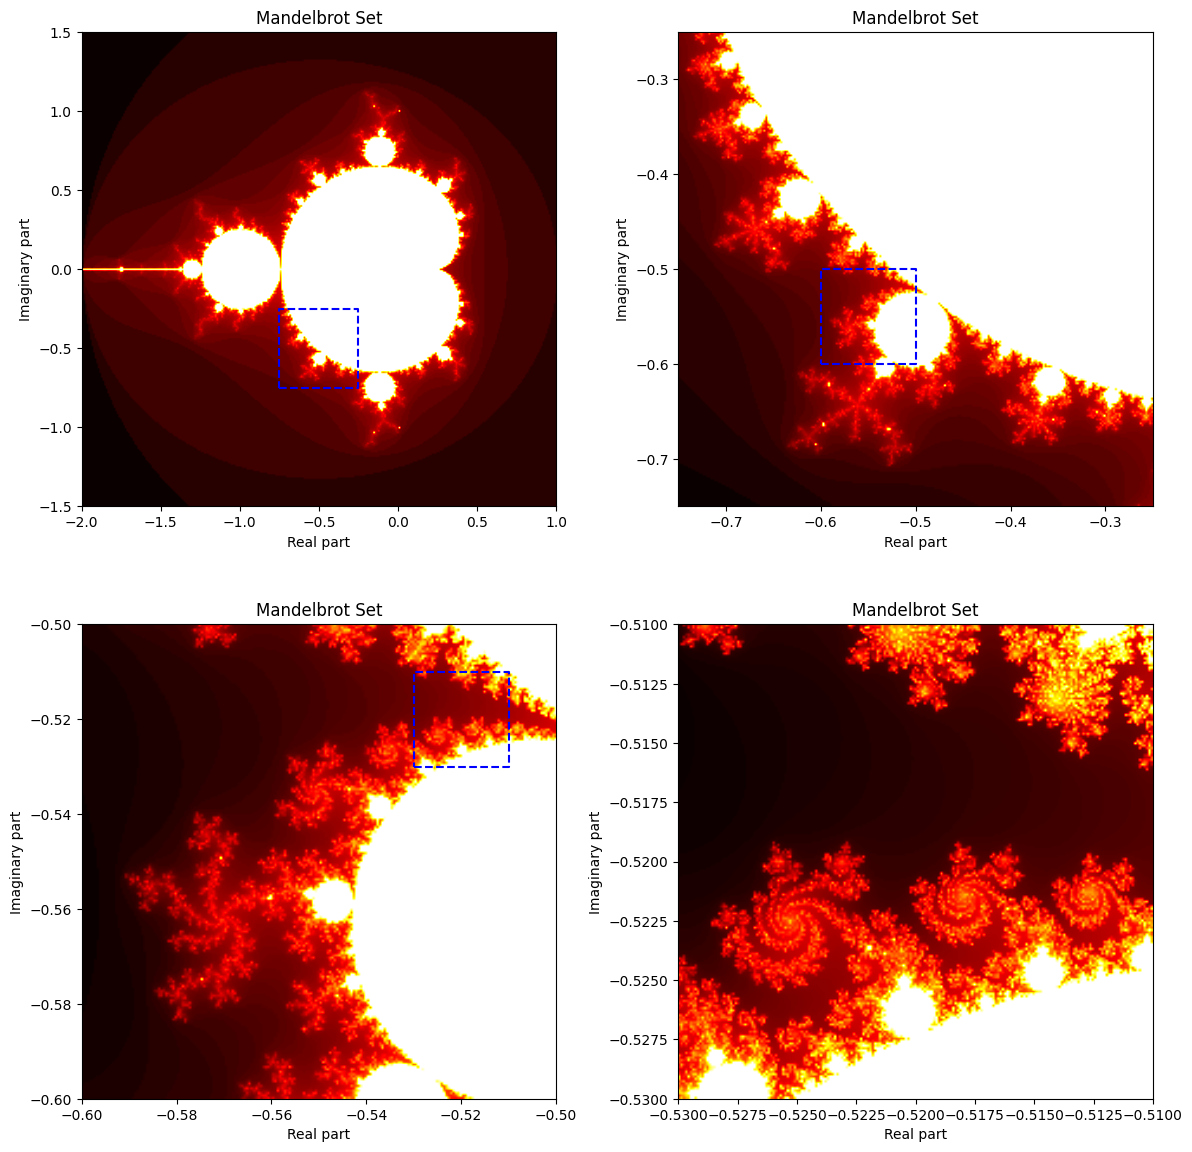

In [20]:
bounds1 = (-2, 1, -1.5, 1.5) # x_min, x_max, y_min, y_max
step1 = 0.01
bounds2 = (-0.75, -0.25, -0.75, -0.25)
step2 = 0.002
bounds3 = (-0.6, -0.5, -0.6, -0.5)
step3 = 0.0005
bounds4 = (-0.53, -0.51, -0.53, -0.51)
step4 = 0.0001


# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
plot_mandelbrot(axs[0,0], bounds1, step1)
axs[0,0].plot([bounds2[0], bounds2[1], bounds2[1], bounds2[0], bounds2[0]],
              [bounds2[2], bounds2[2], bounds2[3], bounds2[3], bounds2[2]], 'b--')
plot_mandelbrot(axs[0,1], bounds2, step2)
axs[0,1].plot([bounds3[0], bounds3[1], bounds3[1], bounds3[0], bounds3[0]],
              [bounds3[2], bounds3[2], bounds3[3], bounds3[3], bounds3[2]], 'b--')
plot_mandelbrot(axs[1,0], bounds3, step3)
axs[1,0].plot([bounds4[0], bounds4[1], bounds4[1], bounds4[0], bounds4[0]],
              [bounds4[2], bounds4[2], bounds4[3], bounds4[3], bounds4[2]], 'b--')
plot_mandelbrot(axs[1,1], bounds4, step4)
for i in range(2):
    for j in range(2):
        axs[i, j].set_aspect('equal')
        axs[i, j].set_xlabel("Real part")
        axs[i, j].set_ylabel("Imaginary part")
        # axs[i, j].grid()
        axs[i, j].set_title("Mandelbrot Set")

plt.tight_layout()
plt.show()